Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


Load Dataset

In [2]:
# Load the dataset
file_path = 'spark_bugs.csv'  # Update with your actual file path
df = pd.read_csv(file_path)
df.head()

,Summary,Issue id,Status,Priority,Resolution,Created,Resolved,Affects Version/s,Description
0,Make PySpark working with Python 3.7,13525982,Resolved,Blocker,Fixed,24/Feb/23 03:04,24/Feb/23 05:15,3.4.0,{code}\r\n+ ./python/run-tests --python-execut...
1,DataFrame.drop should handle multi columns pro...,13524752,Resolved,Blocker,Fixed,15/Feb/23 02:46,24/Feb/23 00:03,3.4.0,{code:java}\r\nfrom pyspark.sql import Row\r\n...
2,Prevent `docker-image-tool.sh` from publishing...,13524945,Resolved,Blocker,Fixed,16/Feb/23 04:41,16/Feb/23 05:53,3.2.4,https://github.com/docker/buildx/issues/1509
3,JsonProtocol should handle null JSON strings,13524305,Resolved,Blocker,Fixed,11/Feb/23 01:12,11/Feb/23 05:54,3.4.0,"*Event Log*\r\n{code}\r\n{""Declaring Class"":""o..."
4,CONV() silently overflows returning wrong results,13524280,In Progress,Critical,NaN,10/Feb/23 19:03,NaN,3.4.0,spark-sql> SELECT CONV(SUBSTRING('0xffffffffff...


Distribution of Key Attributes (Status, Priority, Resolution)

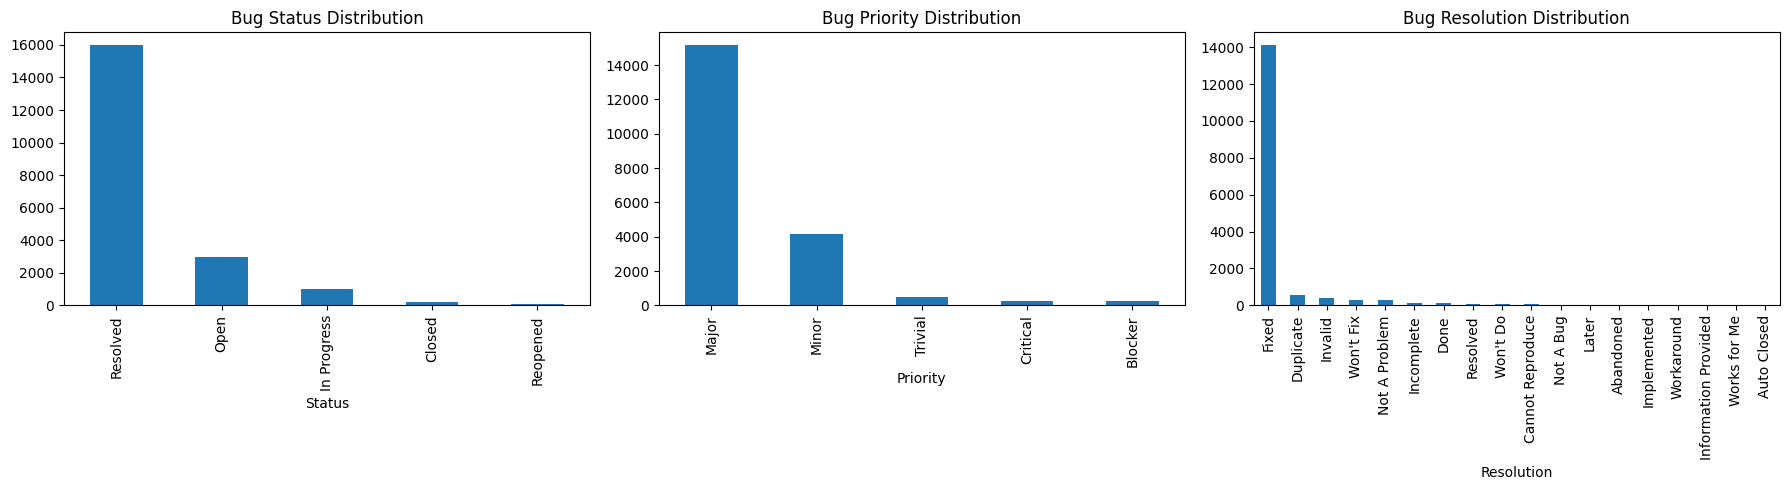

In [3]:
# Count plots for categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bug Status Distribution
df['Status'].value_counts().plot(kind='bar', ax=axes[0], title='Bug Status Distribution')

# Bug Priority Distribution
df['Priority'].value_counts().plot(kind='bar', ax=axes[1], title='Bug Priority Distribution')

# Bug Resolution Distribution
df['Resolution'].value_counts().plot(kind='bar', ax=axes[2], title='Bug Resolution Distribution')

plt.tight_layout()
plt.show()


Temporal Analysis - Bug Reports Over Time

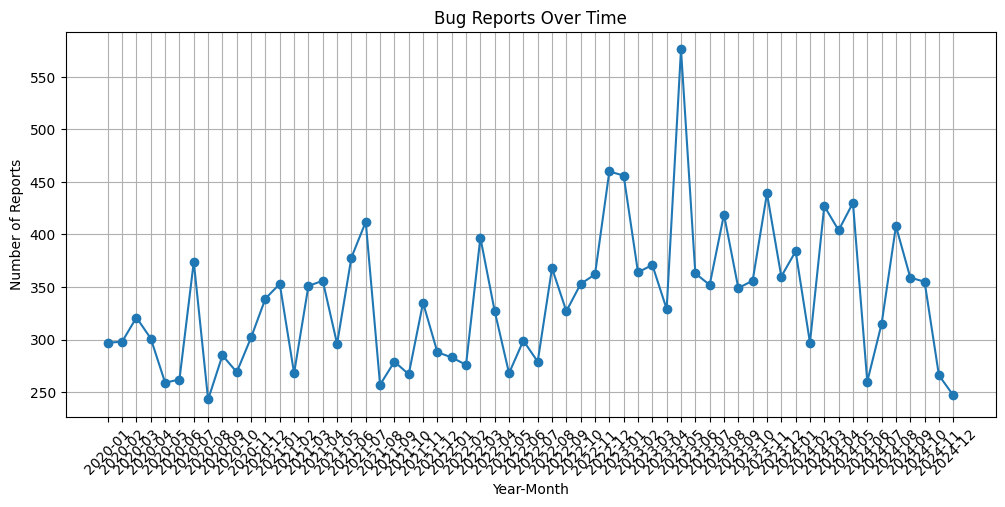

In [5]:
# Convert date columns
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')
df['Resolved'] = pd.to_datetime(df['Resolved'], errors='coerce')

# Extract year-month
df['Created_YearMonth'] = df['Created'].dt.tz_localize(None).dt.to_period('M')
# df['Created_YearMonth'] = df['Created'].dt.to_period('M')

# Count bug reports per month
bug_report_trend = df['Created_YearMonth'].value_counts().sort_index()

# Plot bug report trends
plt.figure(figsize=(12, 5))
plt.plot(bug_report_trend.index.astype(str), bug_report_trend.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Bug Reports Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reports')
plt.grid()
plt.show()


Resolution Time Analysis

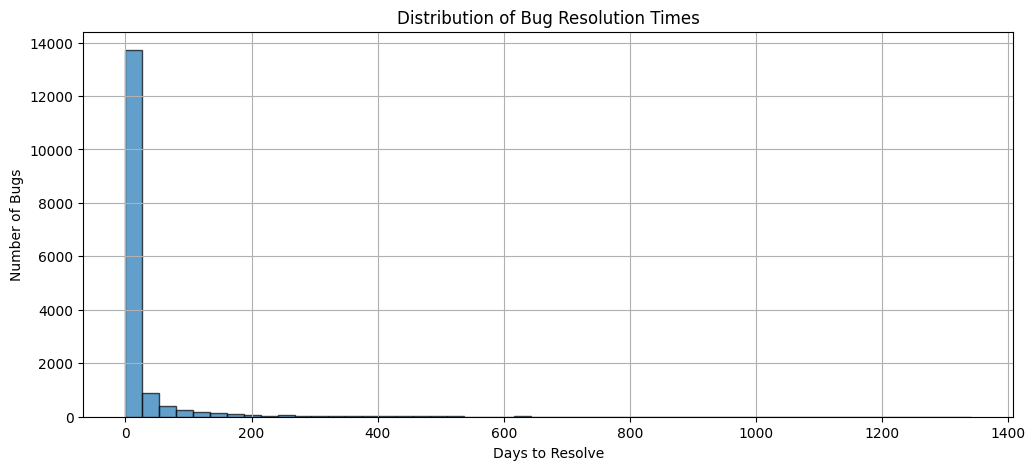

In [6]:
# Calculate resolution time
df['Resolution_Time'] = (df['Resolved'] - df['Created']).dt.days

# Plot distribution
plt.figure(figsize=(12, 5))
plt.hist(df['Resolution_Time'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bug Resolution Times')
plt.xlabel('Days to Resolve')
plt.ylabel('Number of Bugs')
plt.grid()
plt.show()


Word Cloud for Bug Descriptions
python
Copy
Edit


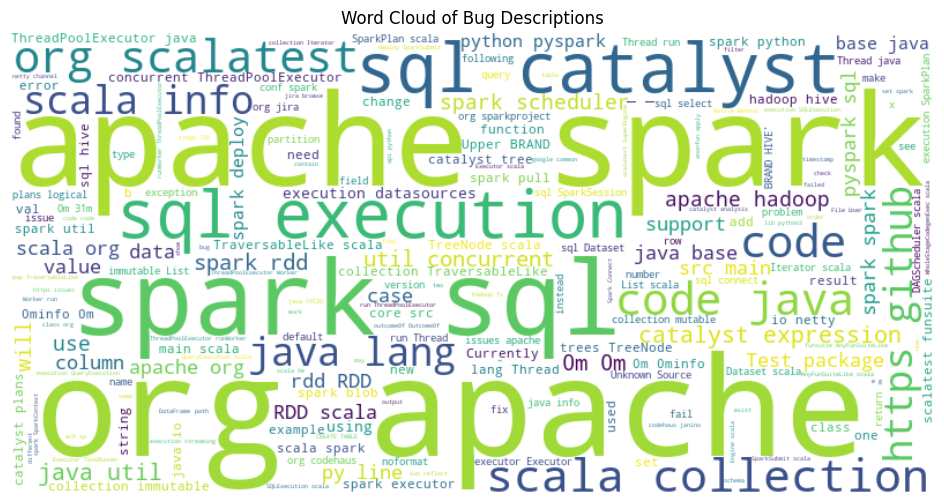

In [7]:
# Word Cloud for bug descriptions
text_data = ' '.join(str(desc) for desc in df['Description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bug Descriptions')
plt.show()
